# Explore Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# Acquire

In [2]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = get_store_data()
df.head()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [3]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [5]:
df.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221


In [6]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

# Prepare

<AxesSubplot:xlabel='sale_date'>

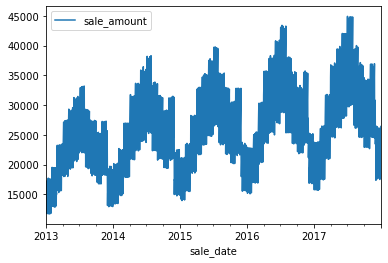

In [7]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

# Split data
### human based split

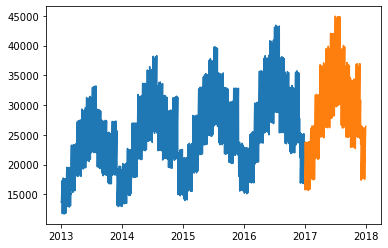

In [8]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

In [11]:
train.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221


# Explore

In [16]:
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

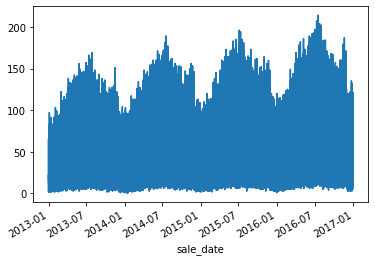

In [17]:
y.plot();

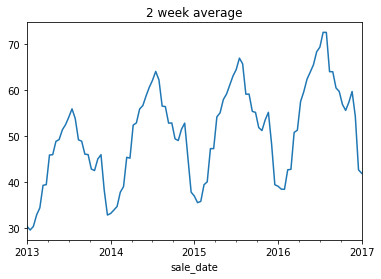

In [18]:
y.resample('2W').mean().plot(title='2 week average');

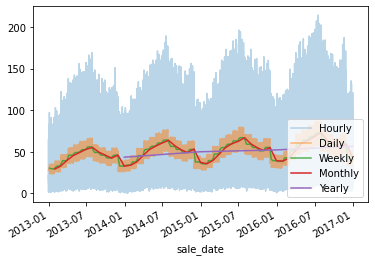

In [19]:
ax = y.plot(alpha=.3, label='Hourly')
y.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

<AxesSubplot:xlabel='sale_date'>

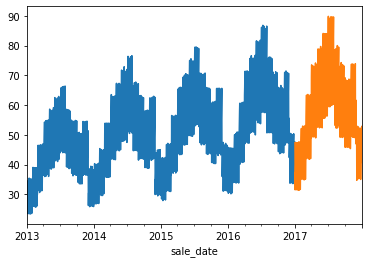

In [21]:
train.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot()

### visualize by month

In [22]:
# make an new column 'month'
df['month'] = df.index.month

<AxesSubplot:xlabel='sale_date'>

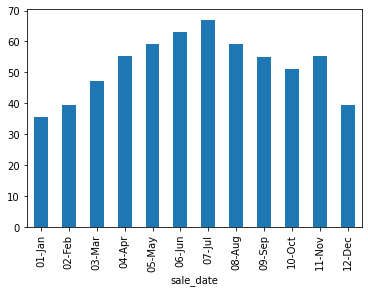

In [25]:
# Plot mean sales by month (bar plot)
# y.groupby(y.index.month).mean().plot.bar()
df.groupby(df.index.strftime('%m-%b')).sale_amount.mean().plot.bar()

In [26]:
# visualize just mean sales amount by month
df.groupby('month').describe()

sale_amount                                                      \
            count       mean        std  min   25%   50%   75%    max   
month                                                                   
1         77500.0  35.524503  18.508468  0.0  21.0  33.0  48.0  120.0   
2         70500.0  39.378397  20.444393  2.0  23.0  36.0  52.0  136.0   
3         77500.0  47.305574  24.269264  3.0  28.0  44.0  63.0  161.0   
4         75000.0  55.152893  28.297197  3.0  32.0  51.0  74.0  182.0   
5         77500.0  59.128219  30.102166  3.0  35.0  55.0  79.0  195.0   
6         75000.0  63.025480  32.025829  5.0  37.0  58.0  84.0  198.0   
7         77500.0  66.998619  34.133458  5.0  39.0  62.0  89.0  231.0   
8         77500.0  59.105226  30.084162  3.0  35.0  55.0  79.0  201.0   
9         75000.0  55.072760  28.168197  4.0  32.0  51.0  73.0  183.0   
10        77500.0  51.193806  26.316421  2.0  30.0  47.0  68.0  168.0   
11        75000.0  55.218080  28.154336  3.0  32.0  51.0  74.0  187.0   
12        77500.0  39.365265  20.458646  1.0  23.0  36.0  53.0  135.0   

       sale_id                 ... store_id       store_zipcode           \
         count           mean  ...      75%   max         count     mean   
month                          ...                                         
1      77500.0  456333.200000  ...      8.0  10.0       77500.0  78224.8   
2      70500.0  456365.390071  ...      8.0  10.0       70500.0  78224.8   
3      77500.0  456392.400000  ...      8.0  10.0       77500.0  78224.8   
4      75000.0  456422.900000  ...      8.0  10.0       75000.0  78224.8   
5      77500.0  456453.400000  ...      8.0  10.0       77500.0  78224.8   
6      75000.0  456483.900000  ...      8.0  10.0       75000.0  78224.8   
7      77500.0  456514.400000  ...      8.0  10.0       77500.0  78224.8   
8      77500.0  456545.400000  ...      8.0  10.0       77500.0  78224.8   
9      75000.0  456575.900000  ...      8.0  10.0       75000.0  78224.8   
10     77500.0  456606.400000  ...      8.0  10.0       77500.0  78224.8   
11     75000.0  456636.900000  ...      8.0  10.0       75000.0  78224.8   
12     77500.0  456667.400000  ...      8.0  10.0       77500.0  78224.8   

                                                               
             std      min      25%      50%      75%      max  
month                                                          
1      16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
2      16.479195  78201.0  78217.0  78220.5  78232.0  78253.0  
3      16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
4      16.479188  78201.0  78217.0  78220.5  78232.0  78253.0  
5      16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
6      16.479188  78201.0  78217.0  78220.5  78232.0  78253.0  
7      16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
8      16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
9      16.479188  78201.0  78217.0  78220.5  78232.0  78253.0  
10     16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  
11     16.479188  78201.0  78217.0  78220.5  78232.0  78253.0  
12     16.479184  78201.0  78217.0  78220.5  78232.0  78253.0  

[12 rows x 64 columns]

<AxesSubplot:xlabel='month', ylabel='sale_amount'>

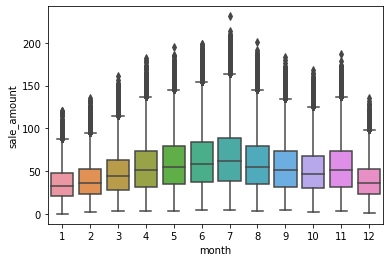

In [29]:
# boxplot for each month
sns.boxplot(data = df, x = 'month', y = 'sale_amount')

### Moving averages

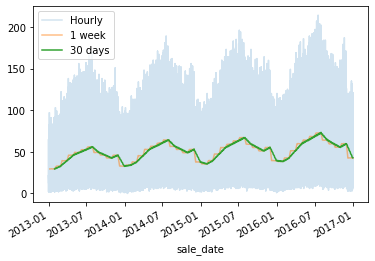

In [30]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=8, label='30 days')
plt.legend()

**Differences**

`.diff` let's us take the difference between the current and previous value.

In [31]:
y.resample('W').mean().diff()

sale_date
2013-01-06 00:00:00+00:00          NaN
2013-01-13 00:00:00+00:00    -0.669381
2013-01-20 00:00:00+00:00    -0.272000
2013-01-27 00:00:00+00:00     0.099429
2013-02-03 00:00:00+00:00     1.636857
                               ...    
2016-12-04 00:00:00+00:00   -10.624000
2016-12-11 00:00:00+00:00    -6.398286
2016-12-18 00:00:00+00:00     0.063714
2016-12-25 00:00:00+00:00    -0.002000
2017-01-01 00:00:00+00:00    -1.703286
Freq: W-SUN, Name: sale_amount, Length: 209, dtype: float64

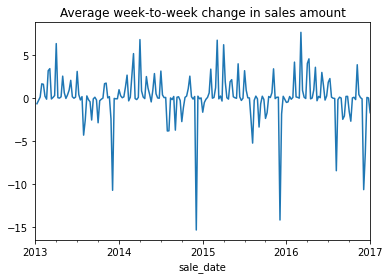

In [34]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales amount');

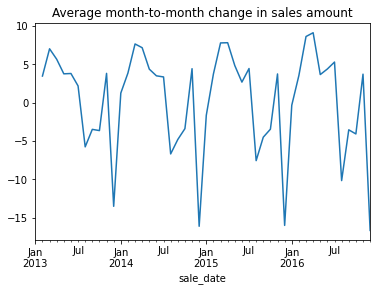

In [35]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales amount');

In [ ]:
# significant drop in sales in December and January months
# peak sales months are during Summer months -May through August